In [1]:
#Poisson-Boltzmann Equation Boundary Value Problem

import scipy.integrate as integrate 
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
# number density array [rho_Ca, rho_Na, rho_Cl] for different Ca concentrations

files_to_read = {}

files_to_read["nacl-150mM-na"]  = "/home/rohit/magnesium/mg-netz/nacl-150mM-new/na.den.xvg"
files_to_read["nacl-150mM-cl"]  = "/home/rohit/magnesium/mg-netz/nacl-150mM-new/cl.den.xvg"

files_to_read["netz-07mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/mg.den.xvg"
files_to_read["netz-07mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/na.den.xvg"
files_to_read["netz-07mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/cl.den.xvg"
files_to_read["netz-07mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/mg-cum.xvg"
files_to_read["netz-07mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/na-cum.xvg"

files_to_read["netz-20mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/mg.den.xvg"
files_to_read["netz-20mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/na.den.xvg"
files_to_read["netz-20mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/cl.den.xvg"
files_to_read["netz-20mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/mg-cum.xvg"
files_to_read["netz-20mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/na-cum.xvg"

files_to_read["netz-33mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/mg.den.xvg"
files_to_read["netz-33mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/na.den.xvg"
files_to_read["netz-33mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/cl.den.xvg"
files_to_read["netz-33mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/mg-cum.xvg"
files_to_read["netz-33mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/na-cum.xvg"


files_to_write = {}

files_to_write["nacl-150mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.150mM.xvg"
files_to_write["nacl-150mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.150mM.xvg"
files_to_write["nacl-150mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.150mM.xvg"

files_to_write["netz-07mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.07mM.xvg"
files_to_write["netz-07mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.07mM.xvg"

files_to_write["netz-20mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.20mM.xvg"
files_to_write["netz-20mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.20mM.xvg"

files_to_write["netz-33mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.33mM.xvg"
files_to_write["netz-33mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.33mM.xvg"

'''
conc = {}
conc["nacl-150mM"] = [0.       , 0.0794375, 0.0745260]
conc["netz-07mM"]  = [0.0047453, 0.0904122, 0.0965279]
conc["netz-17mM"]  = [0.0104131, 0.0746450, 0.0943733]
conc["netz-20mM"]  = [0.0125307, 0.0843833, 0.108683]
conc["netz-33mM"]  = [0.0202396, 0.0894419, 0.1284810]
'''

systems = {}
systems["nacl-150mM"] = [0.       , 0.0794375, 0.0745260]
systems["netz-07mM"]  = [0.00426268, 0.0848139, 0.0923875] #[0.0047453, 0.0904122, 0.0965279] 
systems["netz-17mM"]  = [0.0104131, 0.0746450, 0.0943733]
systems["netz-18mM"]  = [0.0108298, 0.0869196, 0.106701]
systems["netz-20mM"]  = [0.0119045, 0.0853042, 0.108446] #[0.0125307, 0.0843833, 0.108683]# 
systems["netz-33mM"]  = [0.0208943, 0.0888704, 0.130001]


Mg_val = [[0.00920802497, 0.09821893302, 0.09208024971],  # eccr 15 mM Mg
          [0.00919923707, 0.09812519548, 0.09199237076],  # kbi 15 mM Mg
          [0.0091989832,  0.09812248752, 0.09198983205],  # netz 07 mM Mg
          [0.01839322883, 0.07970399163, 0.09196614419],  # eccr 30 mM Mg
          [0.01839901953, 0.07972908465, 0.09199509768],  # kbi 30 mM Mg
          [0.01840041536, 0.07973513324, 0.09200207682]]  # netz 17 mM Mg


K = [[0.00306583, 0.11139169, 0.092999673], #eccr 5 mM N/V densities
     [0.00919567, 0.09910884, 0.09297839],  # eccr 15 mM
     [0.01226006, 0.09297212, 0.09297212],  # eccr 20 mM
     [0.01838639, 0.08069582, 0.09295342]]  # eccr 30 mM

M = [[ 0.002889, 0.0928831, 0.0952638], # ECC  5 mM
     [ 0.007183, 0.0842167, 0.0954956], # ECC 15 mM
     [ 0.002512, 0.0932685, 0.0965381], # ECCR 5 mM
     [ 0.007765, 0.0828493, 0.0965449]] # ECCR 15 mM

#sulfate_distribution_data = {}

In [7]:
lb = 0.78 # Bjerrum length (nm) for SPC/E water at 300K
factor = 4 * np.pi * lb
q_ca = 2
q_na = 1
q_cl = -1
z_d = -24 # bare charge of G2-dPGS

name = "nacl-150mM" #"netz-33mM"

ca_conc, na_conc, cl_conc = systems[name]  

I = 0.5 * ( ca_conc*q_ca**2 + na_conc*q_na**2 + cl_conc*q_cl**2 )\
    / 0.6022 * 1000    # Ionic strength
kappa = (8 * np.pi * lb * I * 0.6022 / 1000 )**0.5

print(kappa**-1, I)
print(kappa*lb)

#print("Debye length =", np.round(kappa**-1, decimals = 2),"nm")
#print("Ionic strength =", np.round(I, decimals = 2),"e^2 nm^-3")

0.8140271294180094 127.83419129857191
0.9581990228724475


In [14]:
def heaviside_s(r, size_dpgs, c_s): 
    # assumes lB is constant throughout - epsilon is constant throughout
    
    cs = c_s*(1 - np.heaviside(r - size_dpgs, 0))
    #cs = c_s*rd/3*( np.heaviside(r - rd + 0.00789, 1)
          #- np.heaviside(r - rd - 0.00789, 1) )
    return cs

def gauss_s(r, C, size_dpgs, sigma_s):
    cs = C * np.exp( (-(r - size_dpgs)**2) / (2*sigma_s**2) )
    return cs

def vol_excl(r, H, sig):
    y = H * np.exp( -r**2 / (2*sig**2) )
    return y

def packing_frac(r, size_dpgs, eta_dpgs, curvature):
    return 1 - eta_dpgs + eta_dpgs/(1 + np.exp(-curvature*(r - size_dpgs)))


In [6]:
n     = 500     # grid number for delta rho_s
rmax  = 4.91
r0    = 0.0001
r = np.linspace(r0, rmax, n)
init = np.full((2, n), 0)   # initialization for solving pb equation
dr = r[1] - r[0]

In [251]:
print(sulfate_distribution_data)

{'0.1': array([[ 0.8   , 11.7219,  0.1   ],
       [ 0.9   ,  9.2918,  0.1   ],
       [ 1.    ,  7.5438,  0.1   ],
       [ 1.1   ,  6.2453,  0.1   ],
       [ 1.2   ,  5.2546,  0.1   ],
       [ 1.3   ,  4.4819,  0.1   ],
       [ 1.4   ,  3.8676,  0.1   ],
       [ 1.5   ,  3.3713,  0.1   ],
       [ 1.6   ,  2.9647,  0.1   ],
       [ 1.7   ,  2.6273,  0.1   ],
       [ 1.8   ,  2.3444,  0.1   ],
       [ 1.9   ,  2.1048,  0.1   ]]), '0.15': array([[0.8   , 7.6672, 0.15  ],
       [0.9   , 6.1015, 0.15  ],
       [1.    , 4.9677, 0.15  ],
       [1.1   , 4.1213, 0.15  ],
       [1.2   , 3.4732, 0.15  ],
       [1.3   , 2.9661, 0.15  ],
       [1.4   , 2.5622, 0.15  ],
       [1.5   , 2.2352, 0.15  ],
       [1.6   , 1.9669, 0.15  ],
       [1.7   , 1.744 , 0.15  ],
       [1.8   , 1.5569, 0.15  ],
       [1.9   , 1.3983, 0.15  ]]), '0.2': array([[0.8   , 5.6024, 0.2   ],
       [0.9   , 4.4819, 0.2   ],
       [1.    , 3.6631, 0.2   ],
       [1.1   , 3.0477, 0.2   ],
       [1.2  

In [15]:
'''
def rho(charge, bulk_conc, phi, r, H, sig):
    
    return charge * bulk_conc * np.exp( -( charge*phi + vol_excl(r, H, sig) ))
    
    
def poisson_boltzmann(r, y):
    
# y[0] = phi potential 
# y[1] = d_phi/dr electric field 
# r = radial distance
    
    y2 = -factor*( rho(q_ca, ca_conc, y[0], r, H, sig) + rho(q_na, na_conc, y[0], r, H, sig)\
                 + rho(q_cl, cl_conc, y[0], r, H, sig) + gauss_s(r, C, size_dpgs, sigma) ) - 2*y[1]/r       
    
    return np.vstack((y[1], y2))
    
'''

def rho(r, charge, bulk_conc, phi): #, r, size_dpgs, eta_dpgs
    
        return  packing_frac(r, size_dpgs, eta_dpgs, curvature) * charge * bulk_conc * np.exp( -charge*phi )


def poisson_boltzmann(r, y):
    
# y[0] = phi potential 
# y[1] = d_phi/dr electric field 
# r = radial distance
    
    y2 = -factor*( rho(r, q_ca, ca_conc, y[0]) + rho(r, q_na, na_conc, y[0]) + rho(r, q_cl, cl_conc, y[0])\
                  + gauss_s(r, C, size_dpgs, sigma_s) ) - 2*y[1]/r       
    #, r, size_dpgs, eta_dpgs
    return np.vstack((y[1], y2))

In [26]:
# boundary condition residuals
def bc(ya, yb):
    # ya = [y(a), y'(a), y''(a)]
    # yb = [y(b), y'(b), y''(b)]
    #return np.array([ya[1] - e_d , yb[1]]) # Neumann 
    return np.array([ya[1], yb[1]]) # Mixed 

## fitting parameters ==> rd, sigma_s = 0.1, eta_dpgs, curvature

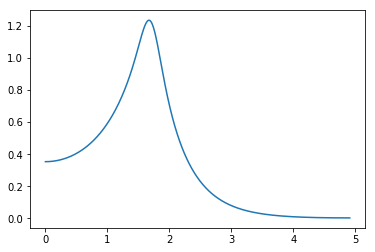

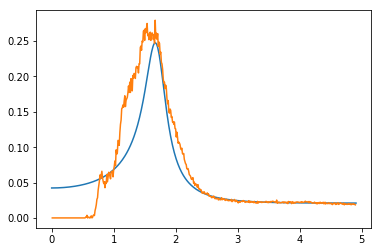

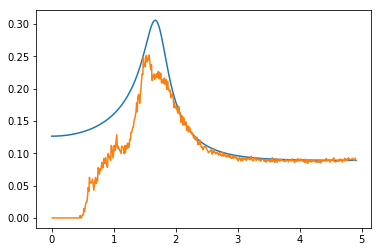

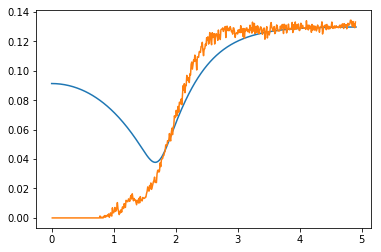

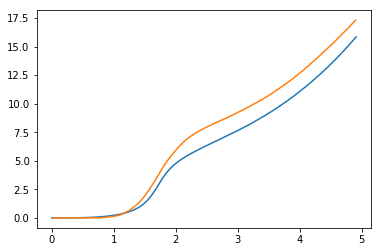

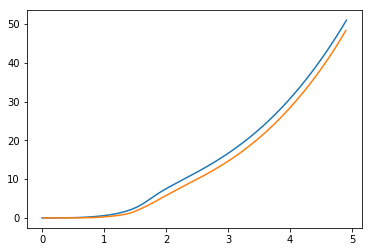

'\n#===========================================================#\nwith open(files_to_write[name + "-mgcum"], "w") as file:\n    for i in range(len(rnew)):\n        file.write(\'%8.8f\t %8.8f\n\' %(rnew[i], N_mg[i])) # pb\n      \nwith open(files_to_write[name + "-nacum"], "w") as file:\n    for i in range(len(rnew)):\n        file.write(\'%8.8f\t %8.8f\n\' %(rnew[i], N_na[i])) # pb\n#===========================================================#\n'

In [27]:
'''
H     = 15
sig   = .3
'''
dist, den_mg = parse_data(files_to_read[name + "-mg"])
dist, den_na = parse_data(files_to_read[name + "-na"])
dist, den_cl = parse_data(files_to_read[name + "-cl"])
distc, mg_cum= parse_data(files_to_read[name + "-mgcum"])
distc, na_cum= parse_data(files_to_read[name + "-nacum"])

'''
sigma_s = '0.1'

rd      =   sulfate_distribution_data[sigma_s][9][0]  # 1.7 nm
C       =  -sulfate_distribution_data[sigma_s][9][1]
sigma_s =   sulfate_distribution_data[sigma_s][9][2]
eta_dpgs     = 0.
curvature    = 10
'''
size_dpgs = 1.7
C         = -2.6273
sigma_s   = 0.1
eta_dpgs  = 0.
curvature = 10

#init_y_val  = 0
#init_y1_val = 0

#init_y  = np.full((1, r.size),  init_y_val)
#init_y1 = np.full((1, r.size),  init_y1_val)
#init = np.vstack((init_y, init_y1)) # 2 rows for y and y'; r.size columns

    
res = integrate.solve_bvp(poisson_boltzmann, bc, r, init)#, verbose = 2)

result = res.sol(r)
rho_mg = []
rho_na = []
rho_cl = []

for j in range(len(r)):
    rho_mg.append(rho(r[j], q_ca, ca_conc, result[0][j])/q_ca) 
    rho_na.append(rho(r[j], q_na, na_conc, result[0][j])/q_na)
    rho_cl.append(rho(r[j], q_cl, cl_conc, result[0][j])/q_cl)


'''
plt.plot(r, rho_mg, dist, den_mg)
plt.show()
plt.plot(r, rho_na, dist, den_na)
plt.show()
#plt.plot(r, rho_cl, dist, den_cl)
#plt.show()
'''
'''
#===========================================================#
with open(files_to_write["netz-33mM-mg"], "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_mg[i])) # pb
        
with open(files_to_write["netz-33mM-na"], "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_na[i])) # pb

with open(files_to_write["netz-33mM-cl"], "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_cl[i])) # pb
   
with open(files_to_write[name + "-cl"], "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_cl[i])) # pb
#===========================================================#
'''

n_mg = [] # Local number of ions
n_na = []
n_cl = []

N_mg = [] # Cumulative number of ions
N_na = []
N_cl = []

for j in range(len(r)):
    n_mg.append(rho_mg[j]*4*np.pi*(r[j]**2)) # local charge densities not number densities
    n_na.append(rho_na[j]*4*np.pi*(r[j]**2))
    n_cl.append(rho_cl[j]*4*np.pi*(r[j]**2))

for i in range(len(r)):
    N_mg.append(integrate.trapz(n_mg[0:i], r[0:i], dx = dr))
    N_na.append(integrate.trapz(n_na[0:i], r[0:i], dx = dr))
    N_cl.append(integrate.trapz(n_cl[0:i], r[0:i], dx = dr))
    
'''
print(sum_residual(r0, 3, r, dist, rho_mg, den_mg, 300))
print(sum_residual(r0, 3, r, dist, rho_na, den_na, 300))
print(sum_residual(r0, 3, r, dist, rho_cl, den_cl, 300))
'''

plt.plot(r, -result[0])
plt.show()
plt.plot(r, rho_mg, dist, den_mg)
plt.show()
plt.plot(r, rho_na, dist, den_na)
plt.show()
plt.plot(r, rho_cl, dist, den_cl)
plt.show()
plt.plot(r, N_mg, distc, mg_cum)
plt.show()
plt.plot(r, N_na, distc, na_cum)
plt.show()

'''
#===========================================================#
with open(files_to_write[name + "-mgcum"], "w") as file:
    for i in range(len(rnew)):
        file.write('%8.8f\t %8.8f\n' %(rnew[i], N_mg[i])) # pb
      
with open(files_to_write[name + "-nacum"], "w") as file:
    for i in range(len(rnew)):
        file.write('%8.8f\t %8.8f\n' %(rnew[i], N_na[i])) # pb
#===========================================================#
'''


In [ ]:
'''
    n_mg = [] # Local number of ions
    n_na = []
    n_cl = []

    N_mg = [] # Cumulative number of ions
    N_na = []
    N_cl = []

    for j in range(len(r)):
        n_mg.append(Rho_mg[j]*4*np.pi*(r[j]**2)) # local charge densities not number densities
        n_na.append(Rho_na[j]*4*np.pi*(r[j]**2))
        n_cl.append(Rho_cl[j]*4*np.pi*(r[j]**2))

    for i in range(len(r)):
        N_mg.append(integrate.trapz(n_mg[0:i], r[0:i], dx = dr))
        N_na.append(integrate.trapz(n_na[0:i], r[0:i], dx = dr))
        N_cl.append(integrate.trapz(n_cl[0:i], r[0:i], dx = dr))

r_new = np.linspace(r0, rmax, len(N_na))

    #residues = [] 

    #for l in rmin_fit:
        #residues.append(sum_residual(l, rmax, r, rho_mg, dist, den))

    #plt.plot(rmin_fit, residues, label = 'rd = %s nm' % np.round(size_dpgs, 3))
    #plt.plot(r, tuple(result[0])) # potential
    #plt.plot(r, rho_mg, label = 'rd = %s nm' % np.round(size_dpgs, 3))

#plt.show()

dist1, n_mg      = parse_data("/home/rohit/magnesium/netz-30mM-mg/mg-cum.xvg")
dist, rho_mg      = parse_data("/home/rohit/magnesium/netz-30mM-mg/den/mg.den.xvg")

dist2, n_na      = parse_data("/home/rohit/magnesium/netz-30mM-mg/na-cum.xvg")
dist, rho_na      = parse_data("/home/rohit/magnesium/netz-30mM-mg/den/na.den.xvg")

dist3, n_cl       = parse_data("/home/rohit/magnesium/netz-30mM-mg/cl-cum.xvg")
dist, rho_cl      = parse_data("/home/rohit/magnesium/netz-30mM-mg/den/cl.den.xvg")

dist4, den_s       = parse_data("/home/rohit/magnesium/netz-30mM-mg/den/s.den.xvg")
dist5, potential   = parse_data("/home/rohit/magnesium/netz-30mM-mg/potential.xvg")

fig = plt.figure()
plt.subplots_adjust(right = 1.5, top = 1, wspace = 0.2, hspace = .0)
#fig.suptitle('Organization', x = 1.2, y = 2.75, fontsize = 30 )
#color = 'xkcd:prussian blue'
'''

'''
plt.subplot(221)
plt.plot(r, tuple(-result[0]))
plt.plot(dist4, potential)
plt.ylabel('phi')
#plt.plot(r, gau(r, size_dpgs, sigma))
#plt.plot(r, vol_excl(r, H, sig))

plt.subplot(222)
plt.plot(dist4, den_s)
plt.plot(r,gau(r, -C, size_dpgs, sigma))
plt.ylabel('rho_s')

plt.subplot(121)
plt.plot(r_new, N_mg, label = 'pb')
plt.plot(dist1, n_mg, label = 'sim')
#plt.plot(r,gau(r, -C, size_dpgs, sigma))
#plt.plot(r,vol_excl(r, H, sig))
#plt.axis([0, 5, 0, 0.25])
plt.ylabel('N_mg')
plt.legend()

plt.subplot(122)
plt.plot(r, Rho_mg, label = 'pb')
plt.plot(dist, rho_mg, label = 'sim')
plt.ylabel('rho_mg')
plt.legend()

plt.subplot(121)
plt.plot(r_new, N_na, label = 'pb')
plt.plot(dist2, n_na, label = 'sim')
plt.ylabel('N_na')
plt.legend()

plt.subplot(122)
plt.plot(r, Rho_na, label = 'pb')
plt.plot(dist, rho_na, label = 'sim')
plt.ylabel('rho_na')
plt.legend()


plt.subplot(225)
plt.plot(r, rho_cl)
plt.plot(dist3, den_cl)
plt.ylabel('rho_cl')
'''



'''

with open("/home/rohit/magnesium/pb-plots/pb-penetrable-eccr-15mM-mg-den.rd-1.0.xvg", "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_mg[i])) # pb

with open("/home/rohit/magnesium/pb-plots/pb-penetrable-eccr-15mM-na-den.rd-1.0.xvg", "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_na[i])) # pb
        
with open("/home/rohit/magnesium/pb-plots/pb-penetrable-eccr-15mM-cl-den.rd-1.0.xvg", "w") as file:
    for i in range(len(r)):
        file.write('%8.8f\t %8.8f\n' %(r[i], rho_cl[i])) # pb
        
'''

In [8]:
def parse_data(data_file):

    with open(data_file) as file:
        
        lines = file.readlines()

    a = ([line.strip().split() for line in lines])

# turn array strings into numbers
    
    b = np.array(a)
    u = b.astype(np.float)

    r = u[:,0] # radial distance
    c = u[:,1] # charge density

    #return np.vstack((r, c))
    return r, c

## Find amplitude for sulfate distribution

In [191]:
rd = np.arange(0.8, 2.0, 0.1)
sigma_s     = 0.3
least_count_c_array = 1
C_array   = np.arange(0, 20, least_count_c_array)

def find_amplitude_s_den(r, C_array, size_dpgs, sigma):
    
    residual = []
    
    for C_item in C_array:
        
        n_local = [ gauss_s(r_i, C_item, size_dpgs, sigma) * 4*np.pi*r_i**2 for r_i in r ]
        
        N = [ integrate.trapz( n_local[0:i], r[0:i], dx = dr ) for i in range(len(r)) ]
         
        residual.append( abs(z_d + N[-1]) )
        
    return C_array[ np.where( residual == min(residual) )[0][0] ], min(residual)



def refine_amplitude_value(r, C_array, size_dpgs, sigma):
    
    amplitude = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[0] 
    res       = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[1]
    
    margin = least_count_c_array
    step   = 0.1 * margin
    
    for _ in range(4):
    
        C_array   = np.arange(amplitude - margin, amplitude + margin, step)
    
        amplitude = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[0]
        res       = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[1]
        
        margin, step = 0.1*margin, 0.1*step
    
    return amplitude, res

amplitudes = [ refine_amplitude_value(r, C_array, size, sigma_s) for size in rd ]

In [192]:
# array of rd and corresponding amplitude for sulfate gaussian distribution, for sigma_s = 0.1
print("rd\tC\tsigma_s\n")

sulfate_distribution_data[str(sigma_s)] = np.zeros((len(rd), 3))

for i in range(len(rd)):
    print(rd[i], "\t", amplitudes[i][0], "\t", sigma_s)
    sulfate_distribution_data[str(sigma_s)][i] = [ rd[i], amplitudes[i][0], sigma_s ]

rd	C	sigma_s

0.8 	 3.479400000000002 	 0.3
0.9 	 2.821999999999999 	 0.3
1.0 	 2.3301 	 0.3
1.1 	 1.9536999999999993 	 0.3
1.2 	 1.6599999999999995 	 0.3
1.2999999999999998 	 1.4267999999999994 	 0.3
1.4 	 1.2388999999999992 	 0.3
1.5 	 1.0853999999999995 	 0.3
1.5999999999999999 	 0.9583999999999999 	 0.3
1.6999999999999997 	 0.8523 	 0.3
1.7999999999999998 	 0.7627 	 0.3
1.8999999999999997 	 0.6864 	 0.3


In [378]:
def sum_residual(rmin, rmax, r_pb, r_sim, rho_pb, rho_sim, number_of_points): # it takes pb fit and simulation den, 
    # creates equal data points by interpolation and evaluates the residual
    
    rnew = np.linspace(rmin, rmax, number_of_points)

    tck1 = interpolate.splrep(r_pb, rho_pb)
    rho_pb_new = interpolate.splev(rnew, tck1)

    tck2 = interpolate.splrep(r_sim, rho_sim)
    rho_sim_new = interpolate.splev(rnew, tck2)

    sum_residual = np.sum( (rho_pb_new - rho_sim_new)**2 )
    
    return sum_residual